## 08. Overfitting and Underfitting 

### 1. Over-Fitting

It occurs when the model performs very well on the train-set, but the model does not perform worse on the validation-set ex) train: 90%, but validation: 80%
- High Variance
- Reason: the model does not learn other various patterns from the train-set
- Solution: 
    - Collect more train-data
    - Regulize the weights to avoid a dependency of the train-set

### 2. Under-Fitting
It occurs when there is no huge-performance-difference between the train and validation, but they do not peform very well
- High Bias
- Reason: the model is too simple to capture the patterns
- Solution: 
    - develop the model more complex
    - relieve the weights' regulizations

### 3. Bias-Variance Trade-Off
- Making sacrifices for one, to earn the other
    - If reduce the Bias (=peformance on train-set increases), then high Variance (= big diff between validation and train)
    - If reduce the Variance (= reduce the gap between validation and train), then high Bias (= performance on train-set reduced)
    
- Therefore, it is important to find an optima point

### 4. SingleLayer_tradeoff Class

In [1]:
class SingleLayer_tradeoff:
    def __init__(self, learning_rate = 0.1):
        self.w = None
        self.b = None
        self.loss = []
        self.val_loss = []
        self.w_history = []
        self.lr = learning_rate
    
    def fwrd(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def bwrd(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.fwrd(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_loss.append(val_loss / len(y_val))
        
    def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.fwrd(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.bwrd(x[i], err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.loss.append(loss / len(y))
            self.update_val_loss(x_val, y_val)
                
    def predict(self, x):
        z = [self.fwrd(xi) for xi in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

### 5. Load the data

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, 
                                                            test_size = 0.2, random_state = 42)
print(x_train_all.shape, x_test.shape, y_train_all.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all,
                                                  test_size = 0.2, random_state = 42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(364, 30) (91, 30) (364,) (91,)


### 6. Scaling

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

### 7. Modeling

In [5]:
layer = SingleLayer_tradeoff()
layer.fit(x_train_scaled, y_train, x_val= x_val_scaled, y_val = y_val)
layer.score(x_train_scaled, y_train)

0.989010989010989

### 8. Trade-off
- it looks like the point at 20 epoch will be a right point

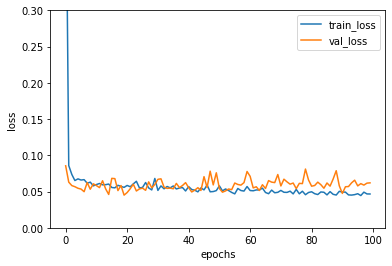

In [6]:
plt.plot(layer.loss)
plt.plot(layer.val_loss)
plt.ylim(0, 0.3)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### 9. Modeling with Early Stopping

In [7]:
layer1 = SingleLayer_tradeoff()
layer1.fit(x_train_scaled, y_train, epochs = 20)
layer1.score(x_val_scaled, y_val)

0.978021978021978